# **RICE LEAF DISEASE DETECTION**



In [1]:
import numpy as np
import keras
from tensorflow import keras
import tensorflow as tf
from tensorflow.keras import layers
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import img_to_array
import matplotlib.pyplot as plt
%matplotlib inline
import random
import cv2
import os
from PIL import Image
import warnings
warnings.filterwarnings('ignore')

In [2]:
pip install split-folders

Note: you may need to restart the kernel to use updated packages.


**TRAIN, TEST, VALIDATION**

In [3]:
import splitfolders
splitfolders.ratio("D:/agrids/PRCP-1001-RiceLeaf/", output="output", seed=1337, ratio=(.8, 0.1,0.1))

Copying files: 3 files [00:00, 58.37 files/s]


In [8]:
train_dir = 'D:/agrids/PRCP-1001-RiceLeaf/Data/'  
validation_dir = 'D:/agrids/PRCP-1001-RiceLeaf/Data/' 
test_dir ='D:/agrids/PRCP-1001-RiceLeaf/Data/'

**GENERATING TRAINING AND VALIDATION BATCHES OF IMAGES**

In [9]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

val_datagen = ImageDataGenerator(rescale=1./255)

batch_size = 16
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(180, 180),
    batch_size=batch_size,
    color_mode='rgb',
    class_mode='categorical')

val_generator = val_datagen.flow_from_directory(
    validation_dir,
    target_size=(180, 180),
    batch_size=batch_size,
    color_mode='rgb',
    class_mode='categorical')


train_steps_per_epoch = train_generator.samples // batch_size
val_steps_per_epoch = val_generator.samples // batch_size

Found 119 images belonging to 3 classes.
Found 119 images belonging to 3 classes.


**PLOTTING TRAIN IMAGES WITH THEIR LABELS**

In [10]:
def plots(ims, figsize=(20,25), rows=4, interp = False, title = None):
    f = plt.figure(figsize=figsize)
    cols = len(ims) // rows if len(ims) % 2 ==0 else len(ims) // rows+1
    for i in range(len(ims)):
        sp = f.add_subplot(rows, cols, i+1)
        sp.axis('off')
        sp.set_title(class_names[title[i].tolist().index(1)],fontsize=16)
        plt.imshow(ims[i])

class_names = ['Bacterial leaf blight', 'Brown spot', 'Leaf smut']

In [11]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


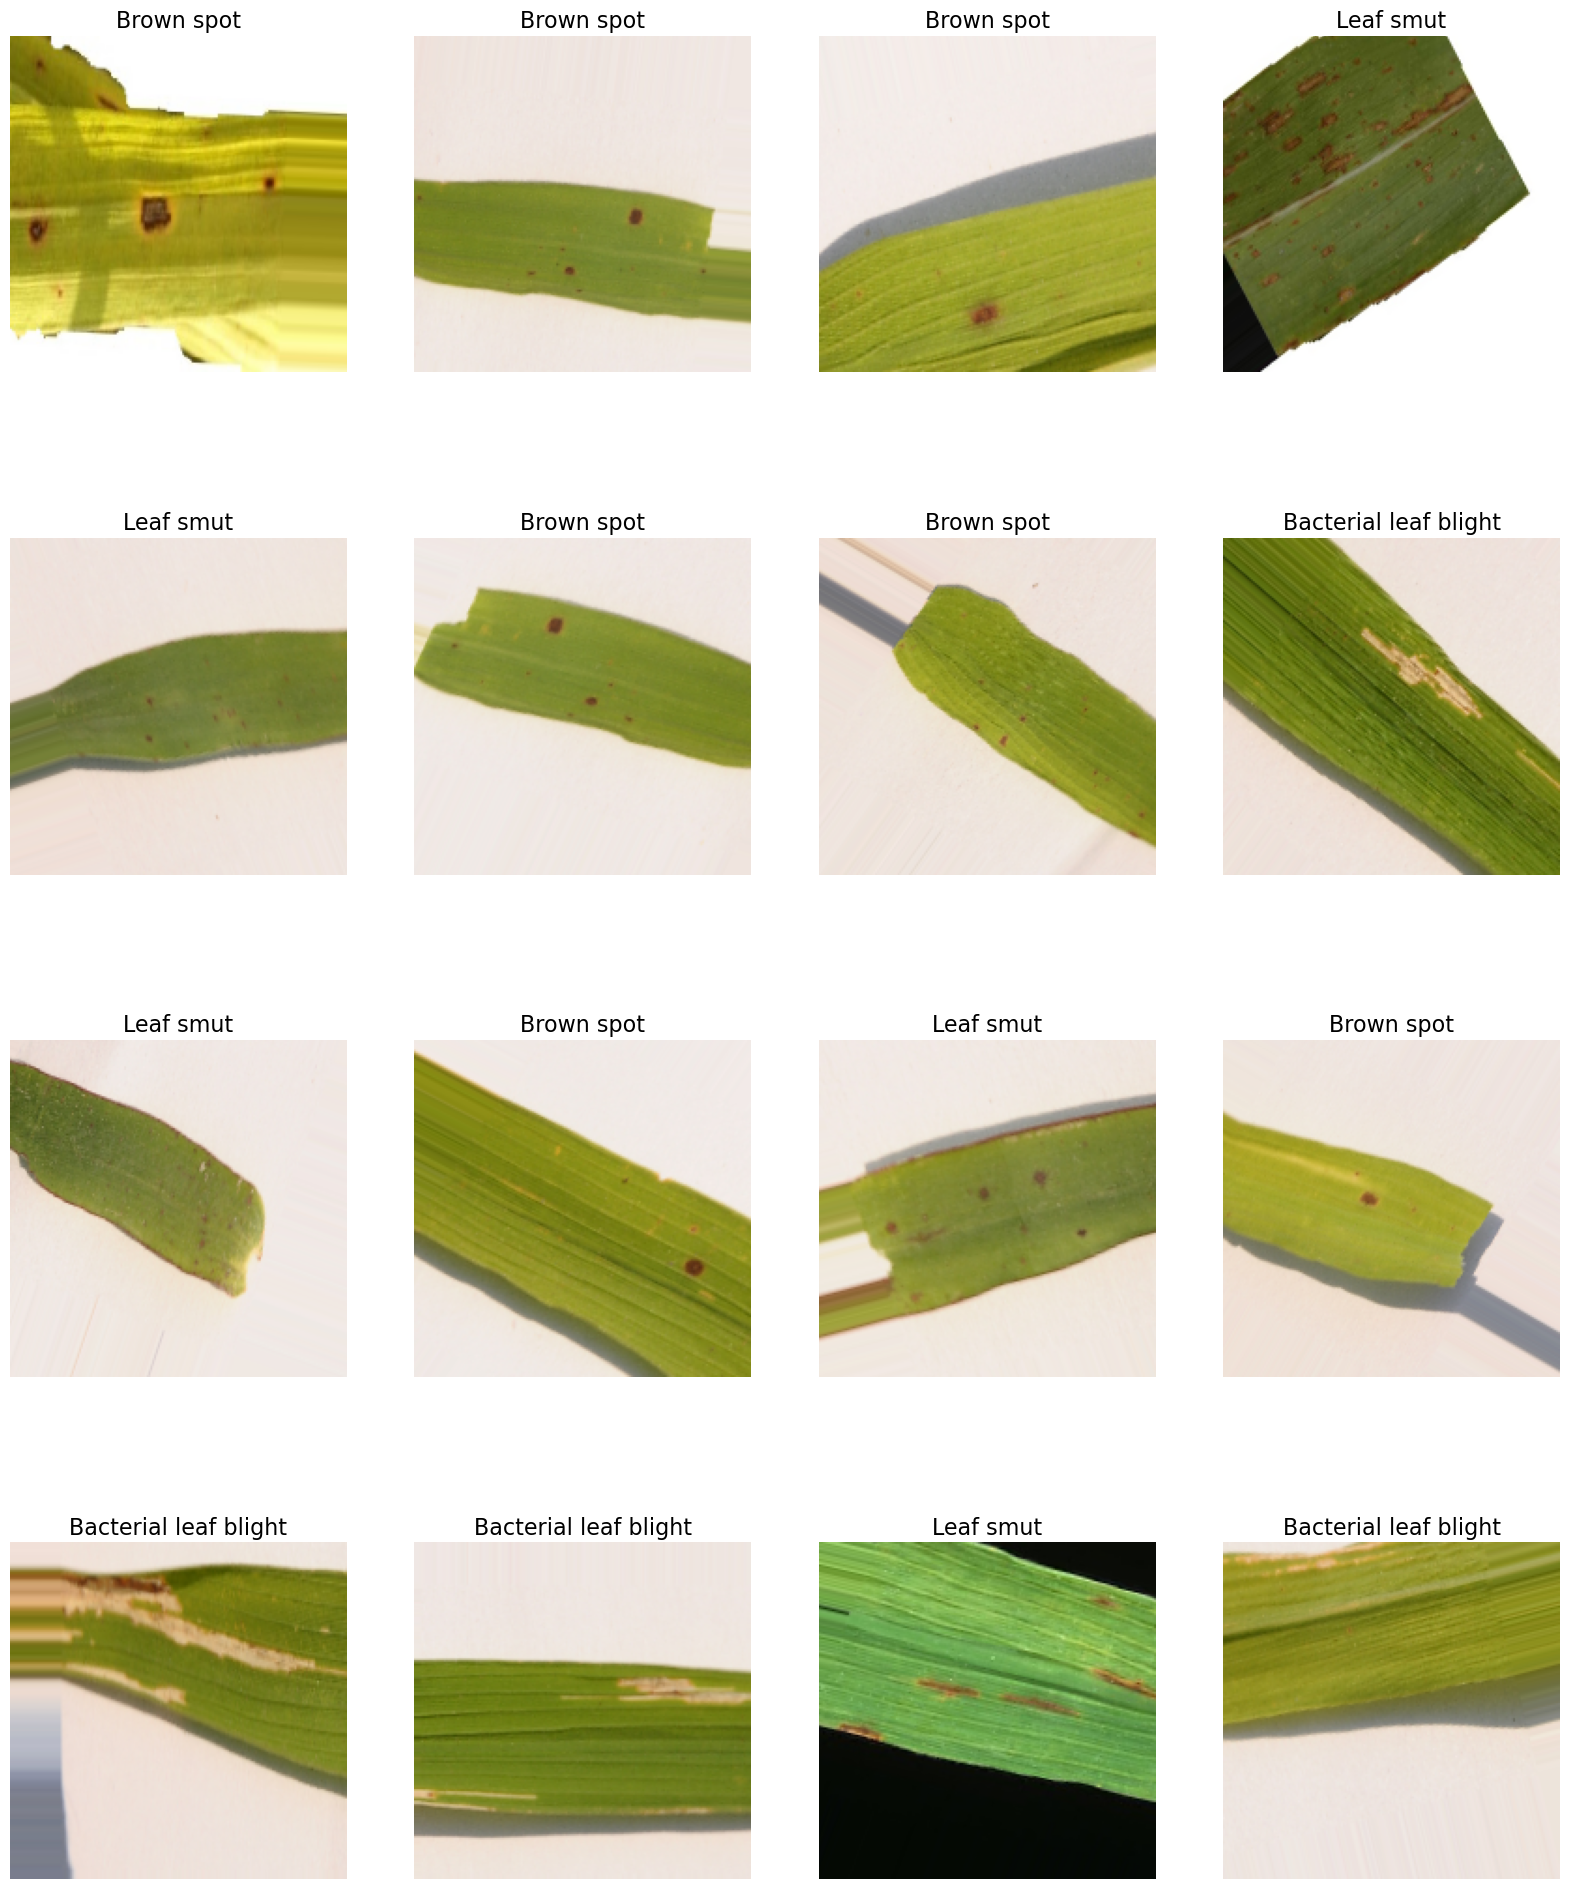

In [12]:
import matplotlib.pyplot as plt

imgs, labels = next(train_generator)
plots(imgs, title=labels)

CNN MODEL ARCHITECTURE

In [14]:
from tensorflow.keras.layers import Activation
from tensorflow.keras import models, layers
model = models.Sequential()
model.add(layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu',input_shape=(180,180,3)))
model.add(layers.MaxPool2D(pool_size=(2,2)))
model.add(layers.Conv2D(filters=64,kernel_size=(3,3),activation= 'relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))
model.add(layers.Conv2D(filters=128,kernel_size=(3,3),activation= 'relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))
model.add(layers.Conv2D(filters=256,kernel_size=(3,3),activation= 'relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))
model.add(layers.Dropout(rate=0.5))
model.add(layers.Flatten())
model.add(layers.Dense(3, activation ='softmax'))

SUMMARY OF MODEL

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 89, 89, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 87, 87, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 43, 43, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 41, 41, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 20, 20, 128)       0

COMPILE MODEL

In [23]:
from tensorflow.keras import optimizers
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)


TRAIN MODEL

In [25]:
# Fitting the data

history = model.fit_generator(train_generator,
    epochs=70, 
    validation_data = val_generator,
)

Epoch 1/70
8/8 [==============================] - 20s 3s/step - loss: 0.4377 - accuracy: 0.7983 - val_loss: 0.4424 - val_accuracy: 0.7983
Epoch 2/70
8/8 [==============================] - 18s 2s/step - loss: 0.5232 - accuracy: 0.7731 - val_loss: 0.3041 - val_accuracy: 0.8655
Epoch 3/70
8/8 [==============================] - 20s 3s/step - loss: 0.4767 - accuracy: 0.7899 - val_loss: 0.2916 - val_accuracy: 0.8571
Epoch 4/70
8/8 [==============================] - 20s 3s/step - loss: 0.4344 - accuracy: 0.8319 - val_loss: 0.3137 - val_accuracy: 0.8824
Epoch 5/70
8/8 [==============================] - 20s 3s/step - loss: 0.4483 - accuracy: 0.8235 - val_loss: 0.2450 - val_accuracy: 0.9076
Epoch 6/70
8/8 [==============================] - 20s 3s/step - loss: 0.4952 - accuracy: 0.7815 - val_loss: 0.2797 - val_accuracy: 0.8992
Epoch 7/70
8/8 [==============================] - 20s 3s/step - loss: 0.4193 - accuracy: 0.8235 - val_loss: 0.3840 - val_accuracy: 0.8235
Epoch 8/70
8/8 [==================

8/8 [==============================] - 20s 2s/step - loss: 0.2778 - accuracy: 0.9076 - val_loss: 0.2779 - val_accuracy: 0.8908
Epoch 61/70
8/8 [==============================] - 20s 3s/step - loss: 0.2573 - accuracy: 0.9160 - val_loss: 0.1037 - val_accuracy: 0.9748
Epoch 62/70
8/8 [==============================] - 20s 3s/step - loss: 0.2168 - accuracy: 0.9160 - val_loss: 0.0872 - val_accuracy: 0.9748
Epoch 63/70
8/8 [==============================] - 20s 3s/step - loss: 0.1809 - accuracy: 0.9412 - val_loss: 0.0864 - val_accuracy: 0.9748
Epoch 64/70
8/8 [==============================] - 19s 3s/step - loss: 0.1271 - accuracy: 0.9664 - val_loss: 0.0735 - val_accuracy: 0.9832
Epoch 65/70
8/8 [==============================] - 20s 3s/step - loss: 0.1621 - accuracy: 0.9328 - val_loss: 0.0943 - val_accuracy: 0.9496
Epoch 66/70
8/8 [==============================] - 20s 3s/step - loss: 0.1780 - accuracy: 0.9328 - val_loss: 0.0669 - val_accuracy: 0.9832
Epoch 67/70
8/8 [======================

**MODEL SAVING**

In [26]:
model.save("ricemodel.h5")

In [27]:
print("Training Accuracy:")
print(history.history['accuracy'])

print("Validation Accuracy:")
print(history.history['val_accuracy'])

Training Accuracy:
[0.7983193397521973, 0.7731092572212219, 0.7899159789085388, 0.831932783126831, 0.8235294222831726, 0.7815126180648804, 0.8235294222831726, 0.8403361439704895, 0.8655462265014648, 0.8739495873451233, 0.8403361439704895, 0.831932783126831, 0.8571428656578064, 0.8403361439704895, 0.9075630307197571, 0.8991596698760986, 0.8571428656578064, 0.8823529481887817, 0.8907563090324402, 0.924369752407074, 0.8907563090324402, 0.8823529481887817, 0.8823529481887817, 0.8991596698760986, 0.9075630307197571, 0.9159663915634155, 0.8067227005958557, 0.8907563090324402, 0.8739495873451233, 0.9159663915634155, 0.9159663915634155, 0.924369752407074, 0.8907563090324402, 0.8907563090324402, 0.8235294222831726, 0.8823529481887817, 0.8991596698760986, 0.8739495873451233, 0.8823529481887817, 0.9327731132507324, 0.924369752407074, 0.9411764740943909, 0.8823529481887817, 0.8823529481887817, 0.8907563090324402, 0.8991596698760986, 0.8991596698760986, 0.924369752407074, 0.9327731132507324, 0.9243

In [28]:
final_train_accuracy = history.history['accuracy'][-1]
final_val_accuracy = history.history['val_accuracy'][-1]

print(f'Final Training Accuracy: {final_train_accuracy:.4f}')
print(f'Final Validation Accuracy: {final_val_accuracy:.4f}')


Final Training Accuracy: 0.9748
Final Validation Accuracy: 0.9916


**PLOTTING THE TRAINING ACCURACY AND VALIDATION ACCURACY AND TRAINING LOSS AND VALIDATION LOSS**

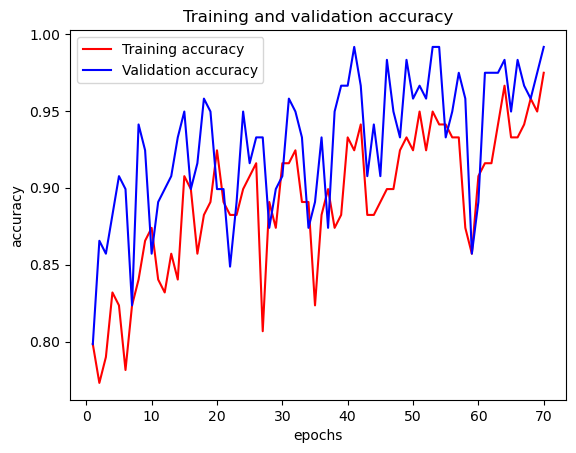

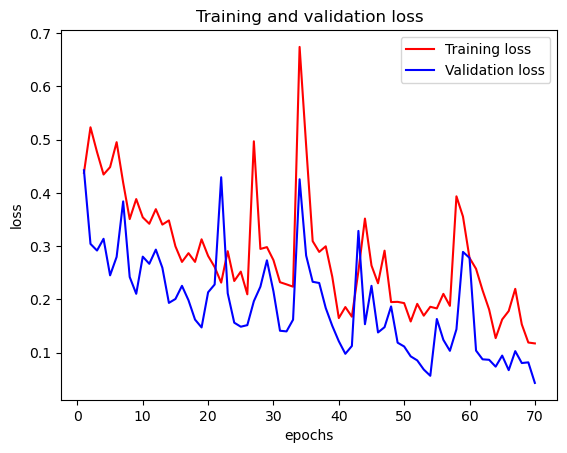

In [29]:
import matplotlib.pyplot as plt
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "r", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "r", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.legend()
plt.show()

In [31]:
model = tf.keras.models.load_model("ricemodel.h5")
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 89, 89, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 87, 87, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 43, 43, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 41, 41, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 20, 20, 128)       0

In [32]:
test_datagen = ImageDataGenerator(rescale=(1./255))


test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(180,180),
    batch_size=16,
    color_mode='rgb',
    class_mode='categorical')

Found 119 images belonging to 3 classes.


In [33]:
model.evaluate(test_generator)

8/8 [==============================] - 7s 866ms/step - loss: 0.0429 - accuracy: 0.9916


[0.04289035499095917, 0.9915966391563416]

1/1 [==============================] - 0s 53ms/step


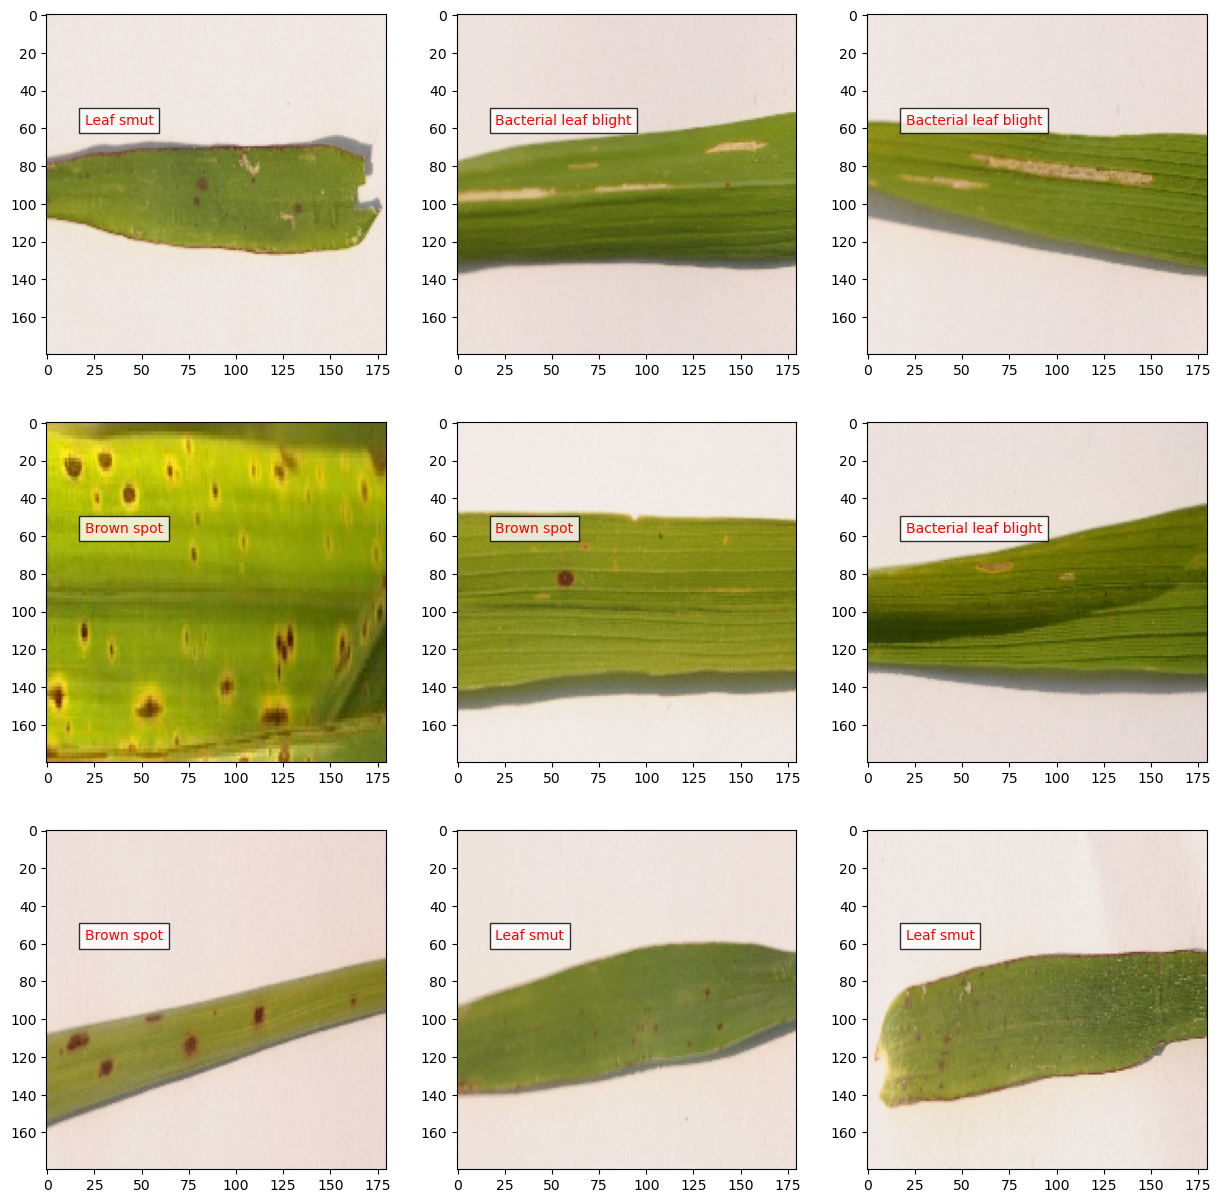

In [34]:
imgs, labels = next(test_generator)
fig =plt.figure(figsize=(15,15))
columns = 3
rows = 3
for i in range(columns*rows):
    fig.add_subplot(rows, columns, i+1)
    img_t = np.expand_dims(imgs[i],axis=0)
    prediction = model.predict(img_t)
    idx = prediction[0].tolist().index(max(prediction[0]))
    plt.text(20,58, class_names[idx],color='red',fontsize=10,bbox=dict(facecolor='white',alpha=0.8))
    plt.imshow(imgs[i])